# Importação das bibliotecas

In [78]:
"""
1°) Importação do pandas como pd para trabalhar com dados.
"""
import pandas as pd
"""
2°) Importação do numpy como np para trabalhar com matrizes
"""
import numpy as np
"""
3°) Importação do matplotlib.pyplot como plt para fazer gráficos.
"""
import matplotlib.pyplot as plt
"""
4°) De matplotlib.ticker vamos importar o AutoMinorLocator e o MaxNLocator para trabalhar com os "ticks"
    dos gráficos.
"""
from matplotlib.ticker import AutoMinorLocator, MaxNLocator
from matplotlib.font_manager import FontProperties
"""
5°) Importação do seaborn e do plotly.express para gráficos
"""
import seaborn as sbn
import plotly.express as px
"""
6°) Análise exploratória otimizada
"""
from pandas_profiling import ProfileReport

# Importação dos dados

In [79]:
Dados = pd.read_csv("TRANSMODALL_CE_PLAN1 - Plan1.csv")
Dados.head()

,CIDADE,DISTÂNCIA,VALOR,GASTO,VALOR/IDA,VALOR/KM
0,ACARAU - CE,207.0,3500,2401.2,16.908213,8.454106
1,ACOPIARA - CE,411.0,5800,4603.2,14.111922,7.055961
2,AÇU - RN,372.0,5500,4166.4,14.784946,7.392473
3,ALEXANDRIA - RN,437.0,5500,4894.4,12.585812,6.292906
4,ALMIRO AFONSO - RN,534.0,5500,5980.8,10.299625,5.149813


# Pré-processamento de dados

In [80]:
Dados.dtypes

CIDADE        object
DISTÂNCIA    float64
VALOR          int64
GASTO        float64
VALOR/IDA    float64
VALOR/KM     float64
dtype: object

In [81]:
Dados_faltantes = 100*(Dados.isnull().sum()/len(Dados["DISTÂNCIA"]))
Dados_faltantes

CIDADE       0.0
DISTÂNCIA    0.0
VALOR        0.0
GASTO        0.0
VALOR/IDA    0.0
VALOR/KM     0.0
dtype: float64

In [82]:
Dados.columns

Index(['CIDADE ', 'DISTÂNCIA', 'VALOR ', 'GASTO', 'VALOR/IDA', 'VALOR/KM'], dtype='object')

In [83]:
Fretes_abaixo_do_gasto = Dados.loc[Dados["VALOR "] < Dados["GASTO"]]
Fretes_abaixo_do_gasto

,CIDADE,DISTÂNCIA,VALOR,GASTO,VALOR/IDA,VALOR/KM
4,ALMIRO AFONSO - RN,534.0,5500,5980.8,10.299625,5.149813
7,ANTONIO MARTINS - RN,520.0,5500,5824.0,10.576923,5.288462
8,APODI - RN,450.0,4700,5040.0,10.444444,5.222222
36,ÊRERE -CE,446.0,4600,4995.2,10.313901,5.156951


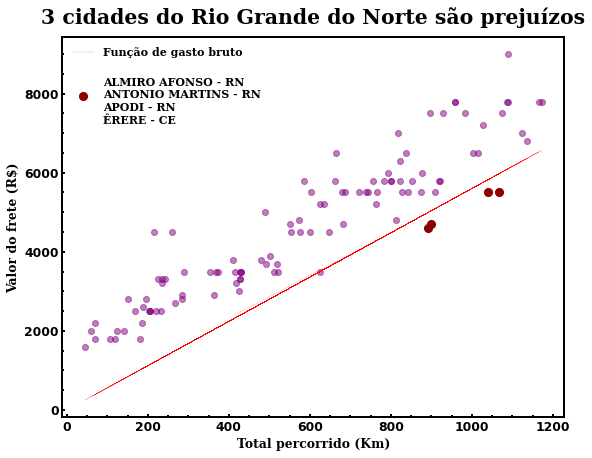

In [84]:
"""
Criação das fontes de texto
"""
Fonte1 = {"family": "serif", #Familia da fonte
          "weight": "bold", #Peso da fonte
          "color": "black", #cor da fonte
          "size": 12.4} #Tamanho da fonte
font2 = FontProperties(family = "Serif", weight = "bold", style = "normal", size = 11)
Fonte3 = {"family": "serif", #Familia da fonte
          "weight": "bold", #Peso da fonte
          "color": "black", #cor da fonte
          "size": 20.4}
"""
Alocando a figura
"""
fig, ax = plt.subplots(figsize = (9, 7))
"""
Plot do gráfico
"""
plt.scatter(2*Dados["DISTÂNCIA"], Dados["VALOR "], color = "purple", alpha = 0.5)
plt.plot(2*Dados["DISTÂNCIA"], Dados["GASTO"], label = "Função de gasto bruto", color = "red", linewidth = 0.15)
plt.scatter(2*Fretes_abaixo_do_gasto["DISTÂNCIA"], Fretes_abaixo_do_gasto["VALOR "], color = "darkred", linewidths = 3.1, label = "\nALMIRO AFONSO - RN\nANTONIO MARTINS - RN\nAPODI - RN\nÊRERE - CE")
plt.grid(False)
"""
Redefinição da grossura dos eixos e da cor dos mesmos
"""
for axis in ["left", "right", "top", "bottom"]:
  ax.spines[axis].set_linewidth(2)
  ax.spines[axis].set_color("black")
"""
Trabalha com os ticks do gráfico
"""  
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis = "both", direction = "in", labelcolor = "black", labelsize = 12.4)
ax.tick_params(which = "minor", direction = "in", width = 2, color = "black")
ax.tick_params(which = "major", direction = "in", color = "black", length=3.4, width = 2)
"""
Labels
"""
ax.set_ylabel("Valor do frete (R$)", fontdict = Fonte1)
ax.set_xlabel("Total percorrido (Km)", fontdict = Fonte1)
"""
Tudo em negrito
"""
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
"""
Fundo branco
"""
fig.patch.set_facecolor("white")
Cor_fundo = plt.gca()
Cor_fundo.set_facecolor("white")
Cor_fundo.patch.set_alpha(1)
fig.patch.set_facecolor("white")
"""
Mostrar gráfico
"""
plt.legend(frameon = False, prop = font2)
plt.text(1280, 10200, "3 cidades do Rio Grande do Norte são prejuízos", rotation=0, fontdict = Fonte3, 
         ha="right", va="top",
         bbox=dict(boxstyle="square",
                   ec=(1, 1, 1),
                   fc=(1, 1, 1),
                   ))
plt.show()

In [85]:
Dados["GASTO"]

0      2401.20
1      4603.20
2      4166.40
3      4894.40
4      5980.80
        ...   
103    4480.00
104    1093.12
105    5364.80
106    3707.20
107    3281.60
Name: GASTO, Length: 108, dtype: float64

In [86]:
Dados["GASTO"] + Dados["VALOR "]*0.25

0      3276.20
1      6053.20
2      5541.40
3      6269.40
4      7355.80
        ...   
103    5930.00
104    1793.12
105    7314.80
106    5157.20
107    4731.60
Length: 108, dtype: float64

In [87]:
Fretes_abaixo_do_esperado = Dados.loc[Dados["VALOR "] < Dados["GASTO"] + Dados["VALOR "]*0.25]
Fretes_abaixo_do_esperado

,CIDADE,DISTÂNCIA,VALOR,GASTO,VALOR/IDA,VALOR/KM
1,ACOPIARA - CE,411.0,5800,4603.2,14.111922,7.055961
2,AÇU - RN,372.0,5500,4166.4,14.784946,7.392473
3,ALEXANDRIA - RN,437.0,5500,4894.4,12.585812,6.292906
4,ALMIRO AFONSO - RN,534.0,5500,5980.8,10.299625,5.149813
5,ALTO DO RODRIGUES - RN,383.0,5500,4289.6,14.360313,7.180157
7,ANTONIO MARTINS - RN,520.0,5500,5824.0,10.576923,5.288462
8,APODI - RN,450.0,4700,5040.0,10.444444,5.222222
12,AREIA BRANCA - RN,341.0,4700,3819.2,13.782991,6.891496
14,BARBALHA-CE,583.0,7800,6529.6,13.379074,6.689537
20,BREJO SANTO - CE,545.0,7800,6104.0,14.311927,7.155963


In [88]:
Fretes_abaixo_do_esperado.shape

(38, 6)

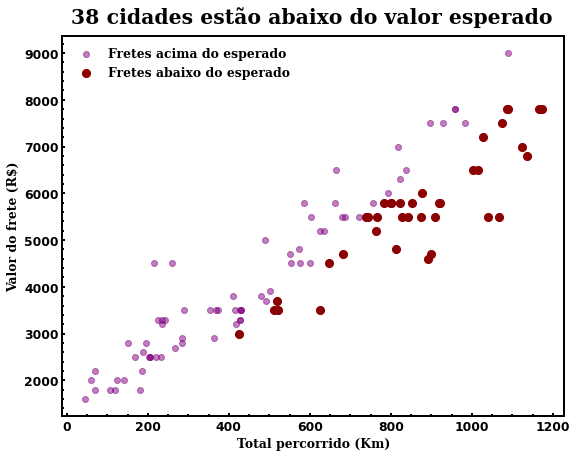

In [89]:
"""
Criação das fontes de texto
"""
Fonte1 = {"family": "serif", #Familia da fonte
          "weight": "bold", #Peso da fonte
          "color": "black", #cor da fonte
          "size": 12.4} #Tamanho da fonte
font2 = FontProperties(family = "Serif", weight = "bold", style = "normal", size = 12.4)
Fonte3 = {"family": "serif", #Familia da fonte
          "weight": "bold", #Peso da fonte
          "color": "black", #cor da fonte
          "size": 20.4}
"""
Alocando a figura
"""
fig, ax = plt.subplots(figsize = (9, 7))
"""
Plot do gráfico
"""
plt.scatter(2*Dados["DISTÂNCIA"], Dados["VALOR "], color = "purple", alpha = 0.5, label = "Fretes acima do esperado")
#plt.plot(2*Dados["DISTÂNCIA"], Dados["GASTO"] + Dados["VALOR "]*0.25, label = "Função de gasto bruto", color = "black", linewidth = 2)
plt.scatter(2*Fretes_abaixo_do_esperado["DISTÂNCIA"], Fretes_abaixo_do_esperado["VALOR "], color = "darkred", linewidths = 3.1, label = "Fretes abaixo do esperado")
plt.grid(False)
"""
Redefinição da grossura dos eixos e da cor dos mesmos
"""
for axis in ["left", "right", "top", "bottom"]:
  ax.spines[axis].set_linewidth(2)
  ax.spines[axis].set_color("black")
"""
Trabalha com os ticks do gráfico
"""  
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis = "both", direction = "in", labelcolor = "black", labelsize = 12.4)
ax.tick_params(which = "minor", direction = "in", width = 2, color = "black")
ax.tick_params(which = "major", direction = "in", color = "black", length=3.4, width = 2)
"""
Labels
"""
ax.set_ylabel("Valor do frete (R$)", fontdict = Fonte1)
ax.set_xlabel("Total percorrido (Km)", fontdict = Fonte1)
"""
Tudo em negrito
"""
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
"""
Fundo branco
"""
fig.patch.set_facecolor("white")
Cor_fundo = plt.gca()
Cor_fundo.set_facecolor("white")
Cor_fundo.patch.set_alpha(1)
fig.patch.set_facecolor("white")
"""
Mostrar gráfico
"""
plt.legend(frameon = False, prop = font2)
plt.text(1200, 10000, "38 cidades estão abaixo do valor esperado", rotation=0, fontdict = Fonte3, 
         ha="right", va="top",
         bbox=dict(boxstyle="square",
                   ec=(1, 1, 1),
                   fc=(1, 1, 1),
                   ))
plt.show()

In [90]:
Dados.shape

(108, 6)

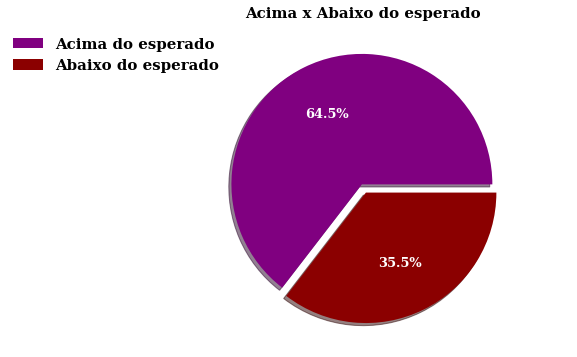

In [91]:
Lista_numbers = []
for i in range(0, 71):
    Lista_numbers.append("Acima do esperado")
for i in range(0, 39):
    Lista_numbers.append("Abaixo do esperado")
Lista_numbers = pd.DataFrame(Lista_numbers)  
"""
Criação da primeira fonte por meio de um dicionário;
Precisamos definir um dicionário passando 4 parâmetros;
family, weight, color e size
"""
font1 = {"family": "serif", "weight": "bold", "color": "black", "size":15}
"""
Criação da segunda fonte por meio da FontProperties()
Também passamos alguns parâmetros, como family, weight, style e size.
"""
font2 = FontProperties(family = "Serif", weight = "bold", style = "normal", size = 15)
"""
Definição das cores do gráfico de pizza.
"""
colors_pie = ["purple", "darkred"]
"""
Criando um "local" para alocar a nossa figura
"""
fig, ax = plt.subplots(figsize = (9, 6))
"""
Plot do gráfico do tipo "pie".
"""
Lista_numbers[0].value_counts().plot(kind = "pie", # Tipo de gráfico
                                     autopct = "%1.1f%%", # Mostrar porcentagens no gráfico
                                     shadow = True, # Sombreamento 
                                     explode = [0.02, 0.05], # Separamento entre as partes
                                     textprops = {"family": "serif", # Definição da fonte para os textos
                                                  "weight": "bold", 
                                                  "color": "white", 
                                                  "fontsize":13},
                                     colors = colors_pie) # cores do gráfico
"""
Definição de um fundo branco.
"""
fig.patch.set_facecolor("white")
"""
Definindo o título do gráfico
"""
ax.set_title("Acima x Abaixo do esperado", fontdict = font1)
"""
Propriedades da legenda da figura
"""
ax.legend(frameon = False, prop = font2, labelcolor = "black", bbox_to_anchor = [0.1, 1])
"""
Definição do label do eixo y
"""
ax.set_ylabel("")
"""
Mostrar gráfico
"""
plt.show()

In [92]:
Lista_de_estados = []
for c in Dados["CIDADE "]:
    if "RN" in c:
        Lista_de_estados.append("RN")
    if "CE" in c:
        Lista_de_estados.append("CE")
    if "PB" in c:
        Lista_de_estados.append("PB")
Lista_de_estados        

['CE',
 'CE',
 'RN',
 'RN',
 'RN',
 'RN',
 'CE',
 'RN',
 'RN',
 'CE',
 'CE',
 'CE',
 'RN',
 'RN',
 'CE',
 'CE',
 'CE',
 'CE',
 'CE',
 'CE',
 'PB',
 'CE',
 'CE',
 'RN',
 'CE',
 'CE',
 'RN',
 'CE',
 'CE',
 'CE',
 'CE',
 'CE',
 'CE',
 'CE',
 'RN',
 'RN',
 'CE',
 'CE',
 'CE',
 'CE',
 'RN',
 'CE',
 'CE',
 'CE',
 'CE',
 'CE',
 'RN',
 'CE',
 'RN',
 'CE',
 'CE',
 'CE',
 'CE',
 'CE',
 'RN',
 'RN',
 'CE',
 'RN',
 'CE',
 'CE',
 'CE',
 'CE',
 'RN',
 'CE',
 'CE',
 'RN',
 'CE',
 'CE',
 'CE',
 'RN',
 'CE',
 'CE',
 'CE',
 'CE',
 'CE',
 'CE',
 'RN',
 'PB',
 'RN',
 'CE',
 'CE',
 'RN',
 'CE',
 'RN',
 'CE',
 'CE',
 'CE',
 'RN',
 'CE',
 'CE',
 'RN',
 'PB',
 'CE',
 'CE',
 'RN',
 'RN',
 'CE',
 'RN',
 'CE',
 'CE',
 'CE',
 'CE',
 'CE',
 'RN',
 'CE',
 'CE',
 'CE',
 'CE']

In [93]:
Lista_de_estados = pd.DataFrame(Lista_de_estados)
Lista_de_estados

,0
0,CE
1,CE
2,RN
3,RN
4,RN
...,...
103,RN
104,CE
105,CE
106,CE


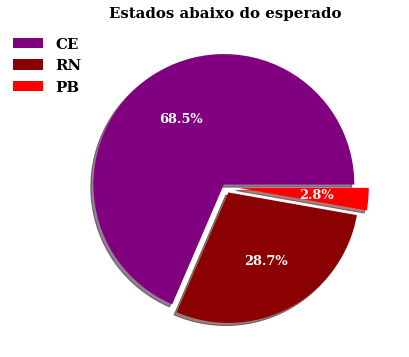

In [94]:
"""
Criação da primeira fonte por meio de um dicionário;
Precisamos definir um dicionário passando 4 parâmetros;
family, weight, color e size
"""
font1 = {"family": "serif", "weight": "bold", "color": "black", "size":15}
"""
Criação da segunda fonte por meio da FontProperties()
Também passamos alguns parâmetros, como family, weight, style e size.
"""
font2 = FontProperties(family = "Serif", weight = "bold", style = "normal", size = 15)
"""
Definição das cores do gráfico de pizza.
"""
colors_pie = ["purple", "darkred", "red"]
"""
Criando um "local" para alocar a nossa figura
"""
fig, ax = plt.subplots(figsize = (9, 6))
"""
Plot do gráfico do tipo "pie".
"""
Lista_de_estados[0].value_counts().plot(kind = "pie", # Tipo de gráfico
                                     autopct = "%1.1f%%", # Mostrar porcentagens no gráfico
                                     shadow = True, # Sombreamento 
                                     explode = [0.02, 0.05, 0.10], # Separamento entre as partes
                                     textprops = {"family": "serif", # Definição da fonte para os textos
                                                  "weight": "bold", 
                                                  "color": "white", 
                                                  "fontsize":13},
                                     colors = colors_pie) # cores do gráfico
"""
Definição de um fundo branco.
"""
fig.patch.set_facecolor("white")
"""
Definindo o título do gráfico
"""
ax.set_title("Estados abaixo do esperado", fontdict = font1)
"""
Propriedades da legenda da figura
"""
ax.legend(frameon = False, prop = font2, labelcolor = "black", bbox_to_anchor = [0.1, 1])
"""
Definição do label do eixo y
"""
ax.set_ylabel("")
"""
Mostrar gráfico
"""
plt.show()

In [95]:
Fretes_acima_do_esperado = Dados.loc[Dados["GASTO"] + Dados["VALOR "]*0.25 <= Dados["VALOR "]]
Fretes_acima_do_esperado

,CIDADE,DISTÂNCIA,VALOR,GASTO,VALOR/IDA,VALOR/KM
0,ACARAU - CE,207.0,3500,2401.20,16.908213,8.454106
6,AMONTADA - CE,121.0,3300,1355.20,27.272727,13.636364
9,AQUIRAZ - CE,90.7,1800,1015.84,19.845645,9.922822
10,ARACATI -CE,209.0,3200,2340.80,15.311005,7.655502
11,ARACOIBA - CE,133.0,2700,1489.60,20.300752,10.150376
...,...,...,...,...,...,...
102,TURURU -CE,93.6,2600,1048.32,27.777778,13.888889
104,URUBURETAMA - CE,97.6,2800,1093.12,28.688525,14.344262
105,VARZEA ALEGRE - CE,479.0,7800,5364.80,16.283925,8.141962
106,VIÇOSA-CE,331.0,5800,3707.20,17.522659,8.761329


In [96]:
Lista_de_cidades_acima_do_esperado = []
for c in Dados["CIDADE "]:
    if "CE" in c:
        Lista_de_cidades_acima_do_esperado.append("CE")
    if "RN" in c:    
        Lista_de_cidades_acima_do_esperado.append("RN")
    if "PB" in c:
        Lista_de_cidades_acima_do_esperado.append("PB")
    if "PI" in c:
        Lista_de_cidades_acima_do_esperado.append("PI")
Lista_de_cidades_acima_do_esperado = pd.DataFrame(Lista_de_cidades_acima_do_esperado)        

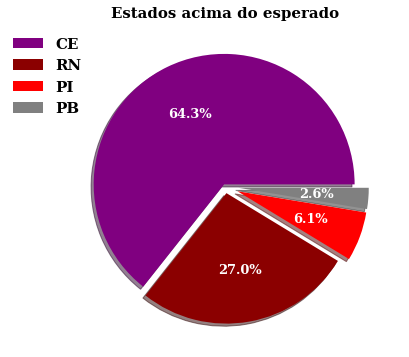

In [97]:
"""
Criação da primeira fonte por meio de um dicionário;
Precisamos definir um dicionário passando 4 parâmetros;
family, weight, color e size
"""
font1 = {"family": "serif", "weight": "bold", "color": "black", "size":15}
"""
Criação da segunda fonte por meio da FontProperties()
Também passamos alguns parâmetros, como family, weight, style e size.
"""
font2 = FontProperties(family = "Serif", weight = "bold", style = "normal", size = 15)
"""
Definição das cores do gráfico de pizza.
"""
colors_pie = ["purple", "darkred", "red", "gray"]
"""
Criando um "local" para alocar a nossa figura
"""
fig, ax = plt.subplots(figsize = (9, 6))
"""
Plot do gráfico do tipo "pie".
"""
Lista_de_cidades_acima_do_esperado[0].value_counts().plot(kind = "pie", # Tipo de gráfico
                                     autopct = "%1.1f%%", # Mostrar porcentagens no gráfico
                                     shadow = True, # Sombreamento 
                                     explode = [0.02, 0.05, 0.10, 0.10], # Separamento entre as partes
                                     textprops = {"family": "serif", # Definição da fonte para os textos
                                                  "weight": "bold", 
                                                  "color": "white", 
                                                  "fontsize":13},
                                     colors = colors_pie) # cores do gráfico
"""
Definição de um fundo branco.
"""
fig.patch.set_facecolor("white")
"""
Definindo o título do gráfico
"""
ax.set_title("Estados acima do esperado", fontdict = font1)
"""
Propriedades da legenda da figura
"""
ax.legend(frameon = False, prop = font2, labelcolor = "black", bbox_to_anchor = [0.1, 1])
"""
Definição do label do eixo y
"""
ax.set_ylabel("")
"""
Mostrar gráfico
"""
plt.show()

In [98]:
# 5 MELHORES FRETES
Fretes_super_faturado = Dados.loc[Dados["GASTO"] + Dados["VALOR "]*0.5 <= Dados["VALOR "]]
Fretes_super_faturado

,CIDADE,DISTÂNCIA,VALOR,GASTO,VALOR/IDA,VALOR/KM
6,AMONTADA - CE,121.0,3300,1355.20,27.272727,13.636364
15,BATURITE-CE,144.0,3500,1612.80,24.305556,12.152778
19,BOA VISTA DISTRITO(ITAPIPOCA),118.0,3200,1321.60,27.118644,13.559322
25,CASCÁVEL -CE,110.0,2500,1232.00,22.727273,11.363636
26,CAUCAIA -CE,34.6,1800,387.52,52.023121,26.011561
37,EUSEBIO -CE,70.7,2000,791.84,28.288543,14.144272
38,FORTALEZA -CE,53.5,1800,599.20,33.644860,16.822430
41,HORIZONTE - CE,92.3,2200,1033.76,23.835320,11.917660
49,ITAPAJÉ - CE,112.0,3300,1254.40,29.464286,14.732143
51,ITAPIPOCA - CE,117.0,3300,1310.40,28.205128,14.102564


In [99]:
Fretes_super_faturado.describe()
# Melhor Frete - São Gonçalo do Amarante

,DISTÂNCIA,VALOR,GASTO,VALOR/IDA,VALOR/KM
count,24.000000,24.000000,24.000000,24.000000,24.000000
mean,86.475000,2654.166667,968.520000,34.755609,17.377804
std,33.826954,786.836907,378.861886,14.101132,7.050566
min,22.400000,1600.000000,250.880000,22.727273,11.363636
25%,61.575000,2000.000000,689.640000,26.527102,13.263551
50%,95.600000,2500.000000,1070.720000,29.076405,14.538203
75%,110.500000,3225.000000,1237.600000,35.245358,17.622679
max,144.000000,4500.000000,1612.800000,71.428571,35.714286


In [100]:
Dados.describe()

,DISTÂNCIA,VALOR,GASTO,VALOR/IDA,VALOR/KM
count,108.000000,108.000000,108.000000,108.000000,108.000000
mean,294.121296,4634.259259,3294.925185,19.625236,9.812618
std,158.183183,1778.330732,1771.243317,10.662557,5.331279
min,22.400000,1600.000000,250.880000,10.299625,5.149813
25%,142.000000,3300.000000,1590.400000,14.085887,7.042944
50%,296.500000,4650.000000,3320.800000,16.099389,8.049695
75%,419.500000,5800.000000,4698.400000,20.331198,10.165599
max,586.000000,9000.000000,6563.200000,71.428571,35.714286


In [101]:
Pior_frete = Dados.loc[Dados["VALOR/KM"] == 5.149813]
Pior_frete

,CIDADE,DISTÂNCIA,VALOR,GASTO,VALOR/IDA,VALOR/KM


In [102]:
# 5 piores Fretes
cinco_piores_Fretes = Dados.loc[Dados["VALOR "] < Dados["GASTO"] + Dados["VALOR "]*0.05]
cinco_piores_Fretes

,CIDADE,DISTÂNCIA,VALOR,GASTO,VALOR/IDA,VALOR/KM
4,ALMIRO AFONSO - RN,534.0,5500,5980.8,10.299625,5.149813
7,ANTONIO MARTINS - RN,520.0,5500,5824.0,10.576923,5.288462
8,APODI - RN,450.0,4700,5040.0,10.444444,5.222222
36,ÊRERE -CE,446.0,4600,4995.2,10.313901,5.156951
88,RERIUTABA,312.0,3500,3494.4,11.217949,5.608974


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


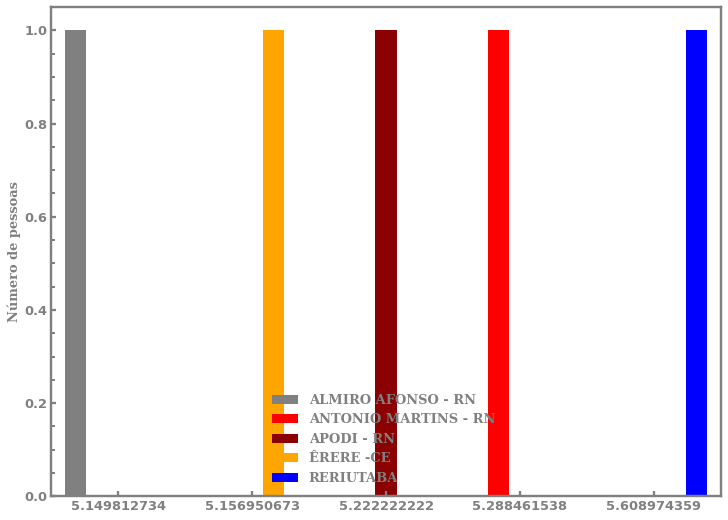

In [103]:
font1 = {"family": "serif", "weight": "bold", "color": "gray", "size":13}
"""
Criação da segunda fonte por meio da FontProperties()
Também passamos alguns parâmetros, como family, weight, style e size.
"""
font2 = FontProperties(family = "Serif", weight = "bold", style = "normal", size = 13)
"""
Criando um "local" para alocar a nossa figura
"""
fig, ax = plt.subplots(figsize = (12,9))
"""
plot de gráfico usando o seaborn
"""
sbn.countplot(cinco_piores_Fretes["VALOR/KM"],
              hue = cinco_piores_Fretes["CIDADE "],
              palette = ["gray", "red", "darkred", "orange", "blue"], # Cores
              saturation = 1) # Saturação das cores
"""
Definição de linewidth e da cor para as bordas do gráfico
"""
for axis in ["left", "right", "top", "bottom"]:
    ax.spines[axis].set_linewidth(2.4) # Definindo o linewidth das bordas do gráfico
    ax.spines[axis].set_color("gray") # Definindo a cor das bordas do gráfico
"""
Trabalhando com os ticks no gráfico 
"""    
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis = "both", direction = "in", labelcolor = "gray", labelsize = 13, left = True, bottom = True, top = False, right = False)
ax.tick_params(which = "major", direction = "in", color = "gray", length = 5.4, width = 2.3)
ax.tick_params(which = "minor", direction = "in", color = "gray", length = 4, width = 2, bottom = False)
"""
Mostrar tudo que é de texto em negrito.
"""
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
"""
Definição de um fundo branco.
"""
fig.patch.set_facecolor("white")
"""
Propriedades da legenda da figura
"""
plt.legend(frameon = False, prop = font2, labelcolor = "gray")
ax.set_xlabel("")
ax.set_ylabel("Número de pessoas", fontdict = font1)
"""
Mostrar gráfico
"""
plt.show()

In [104]:
Fretes_super_faturado

,CIDADE,DISTÂNCIA,VALOR,GASTO,VALOR/IDA,VALOR/KM
6,AMONTADA - CE,121.0,3300,1355.20,27.272727,13.636364
15,BATURITE-CE,144.0,3500,1612.80,24.305556,12.152778
19,BOA VISTA DISTRITO(ITAPIPOCA),118.0,3200,1321.60,27.118644,13.559322
25,CASCÁVEL -CE,110.0,2500,1232.00,22.727273,11.363636
26,CAUCAIA -CE,34.6,1800,387.52,52.023121,26.011561
37,EUSEBIO -CE,70.7,2000,791.84,28.288543,14.144272
38,FORTALEZA -CE,53.5,1800,599.20,33.644860,16.822430
41,HORIZONTE - CE,92.3,2200,1033.76,23.835320,11.917660
49,ITAPAJÉ - CE,112.0,3300,1254.40,29.464286,14.732143
51,ITAPIPOCA - CE,117.0,3300,1310.40,28.205128,14.102564
